# Unsupervised Learning

Unsupervised learning is a branch of machine learning that deals with finding patterns and structure in unlabeled data.

Supervised learning implies that model parameters are estimated in some way. Generally, the problem is reduced to minimize a cost function (or maximize some other metric) that depends directly on the parameters.

Ideally, cost functions are convex functions and the absolute minimum can be easily obtained following the descendant gradient. However, most practical cost functions are non-convex having multiple minimums, some local and some absolute. Non-convex functions are harder to optimize since algorithms cannot ensure finding a close solution.

<img src="images/convex.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

Unlike supervised learning, where you have a predefined goal and a labeled dataset, unsupervised learning allows you to explore and discover the hidden features and relationships in the data without any guidance. This can be challenging, but also rewarding, as you can uncover new insights and generate novel solutions.

Further on, unsupervised learning algorithms consist generally of iterative methods that depend on the initial conditions. These are great for this problems because after getting stuck in a local area early on, it can escape those to find the absolute minimum.

Unsupervised learning is very powerful when having a really huge unlabeled set of data that needs to be processed in an efficient manner. It can be applied to a wide range of real-world problems, such as anomaly detection, customer segmentation, recommender systems, topic modeling, image compression, and more. 

<img src="images/unsupervised.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

# Types of unsupervised learning

Unsupervised learning can be broadly divided into two types: clustering (exploratory analysis) and dimensionality reduction.

## Clustering
__Clustering__ is the process of grouping similar data points together based on some similarity measure, such as distance or density. It is very useful in exploratory analysis because it can automatically identify patterns in data, and correlate them.

Clustering can help you:
* segment your data
* identify outliers
* find natural categories.

> Example: If an analyst was trying to segment consumers, unsupervised clustering methods would be a great starting point. In situations where it is either impossible or impractical for a human to propose trends in the data, unsupervised learning can provide initial insights that can then be used to test individual hypotheses.

<img src="images/clustering.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

For clustering, some of the common algorithms are:
* $k$-Means
* Hierarchical clustering
* DBSCAN
* Gaussian mixture models

### Examples of use cases
* __Marketing__: It can be used to characterize & discover customer segments for marketing purposes.
* __Biology__: It can be used for classification among different species of plants and animals.
* __Libraries__: It is used for grouping different books on the basis of topics and information.
* __Insurance__: It is used to acknowledge the customers, their policies and identifying the frauds.
* __City Planning__: It is used to make groups of houses and to study their values based on their geographical locations and other factors present.
* __Earthquake studies__: By learning the earthquake-affected areas we can determine the dangerous zones.

## Dimensionality reduction
__Dimensionality__ is the number of variables, characteristics or features present in the dataset. In most cases, they are correlated and, therefore, there is some information that is redundant which increase the dataset’s noise. This redundant information impacts negatively in machine learning model’s training and performance and that is why using dimensionality reduction methods becomes important.

__Dimensionality reduction__ is the process of reducing the number of features or variables in your data, while preserving as much information as possible. Dimensionality reduction can help you simplify your data, visualize it, and improve the performance of other machine learning models.

Dimensionality reduction is used as a data transformation technique for input to other machine learning methods such as classifications, or as a very efficient visualisation technique.

<img src="images/dimensionality.jpeg" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

For dimensionality reduction, some of the common techniques are:
* Principal component analysis (PCA)
* Singular value decomposition (SVD)
* t-distributed Stochastic Neighbor Embedding (t-SNE)
* Autoencoders.

# Clustering algorithms

Clustering also involves several different techniques.

## $k$-Means Clustering

$k$-Means is an iterative algorithm that tries to partition the dataset into $k$ pre-defined, distinct, non-overlapping subgroups or clusters, where each data point belongs to only one group.

The algorithm tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (_far_) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (_arithmetic mean of all the data points that belong to that cluster_) is minimized. The less variation we have within clusters, the more homogeneous the data points are within the same cluster.

<img src="images/kmeans.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

The algorithm starts from a matrix of $n$ features in $p$ observations and proceeds as follows:

- __Initialisation__: randomly assign the $p$ obervations to $k$ clusters.

- __Iteration__:
    1. Calculate the centre of each subgroup as the average position of all observations is that subgroup.
    2. Each observation is then assigned to the group of its nearest centre.

> Note: It’s also possible to stop the algorithm after a certain number of iterations, or once the centres move less than a certain distance.

- __Termination__: Repeat the iteration steps until no point changes its cluster membership.

<img src="images/K-means_convergence.gif" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

This algorithm is easy to visualize.

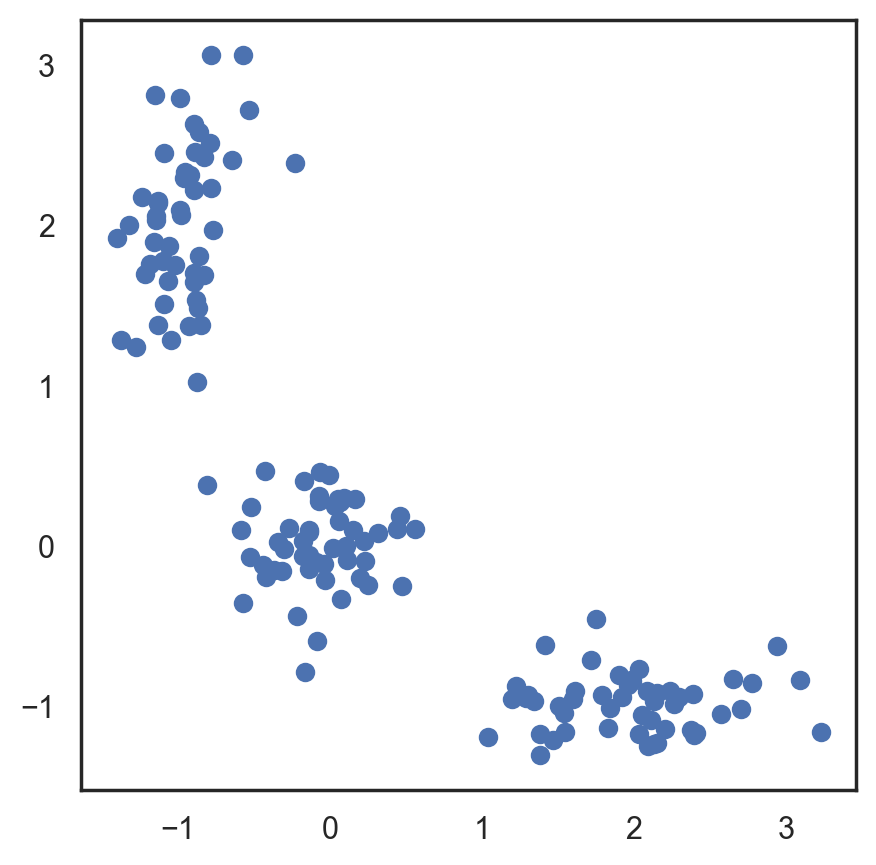

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme(style="white")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Let's begin by allocation 3 cluster's points
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], "bo");

In [5]:
# Scipy has function that takes 2 tuples and return calculated distance between them
from scipy.spatial.distance import cdist

# Randomly allocate the 3 centroids
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1.0, size=6)
centroids = centroids.reshape((3, 2))

cent_history = []
cent_history.append(centroids)

for i in range(3):
    # Calculating the distance from a point to a centroid
    distances = cdist(X, centroids)
    # Checking what's the closest centroid for the point
    labels = distances.argmin(axis=1)

    # Labeling the point according the point's distance
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)

    cent_history.append(centroids)

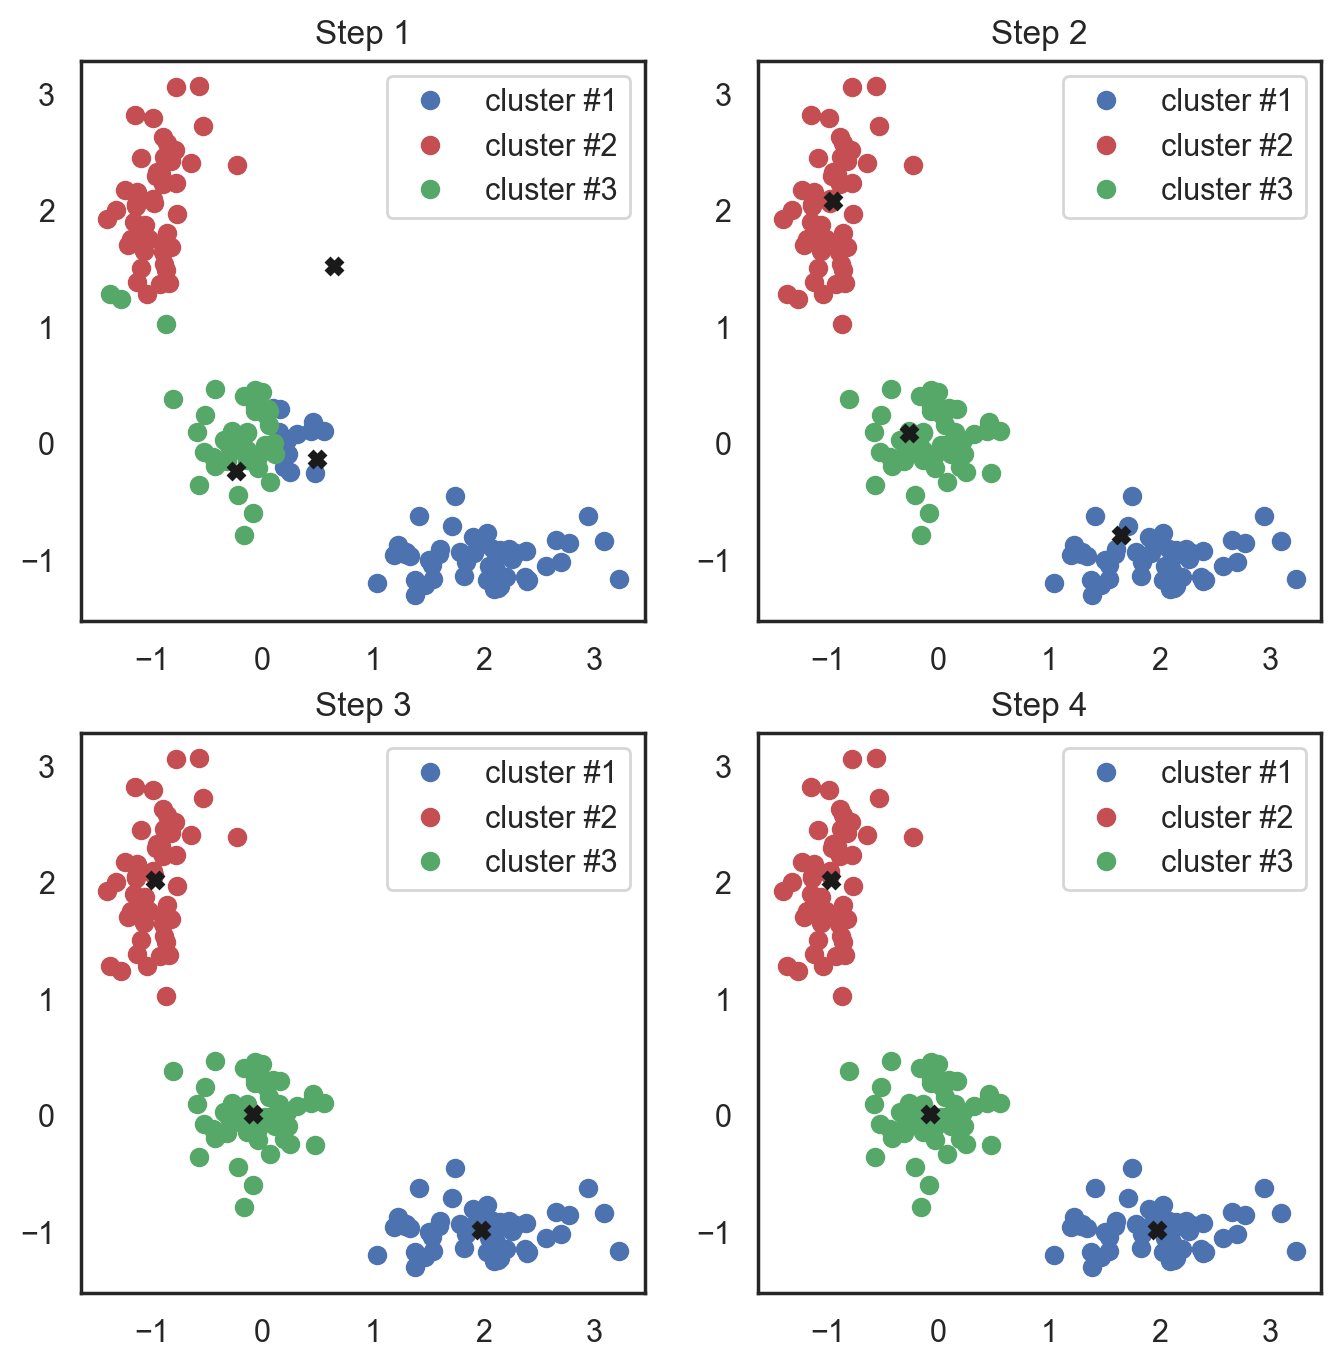

In [6]:
# Plot K-means
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(X[labels == 0, 0], X[labels == 0, 1], "bo", label="cluster #1")
    plt.plot(X[labels == 1, 0], X[labels == 1, 1], "ro", label="cluster #2")
    plt.plot(X[labels == 2, 0], X[labels == 2, 1], "go", label="cluster #3")
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], "kX")
    plt.legend(loc=0)
    plt.title("Step {:}".format(i + 1));

We used Euclidean distance, but the algorithm will converge with any other metric. You can not only vary the number of steps or the convergence criteria but also the distance measure between the points and cluster centroids.

A negative aspect of $k$-means algorithm is its sensitivity to the initial positions of the cluster centroids.
And due to the random initialisation, we can obtain different clustering results.

We can negate this aspect by running $k$-means multiple times and then averaging all the centroid results.

## Model selection
In contrast to the supervised learning tasks such as classification and regression, clustering requires more effort to choose the optimization criterion. Usually, when working with k-means, we optimize the sum of squared distances between the observations and their centroids.

$$ J(C) = \sum_{k=1}^K\sum_{i~\in~C_k} ||x_i - \mu_k|| \rightarrow \min\limits_C,$$

where $C$ – is a set of clusters with power $K$, $\mu_k$ is a centroid of a cluster $C_k$.

This definition seems reasonable as we want our observations to be as close to their centroids as possible. But, there is a problem -- the optimum is reached when the number of centroids is equal to the number of observations, so you would end up with every single observation as its own separate cluster.

In order to avoid that case, we should choose a number of clusters after which a function $J(C_k)$ is decreasing less rapidly. More formally,
$$ D(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_k)|}  \rightarrow \min\limits_k $$

So to determine the number of clusters we need to:

* Run $k$-means with $k=1, k=2, …, k=n$
* Record total within sum of squares for each value of $k$.
* Choose $k$ at the _elbow_ position, as illustrated below.

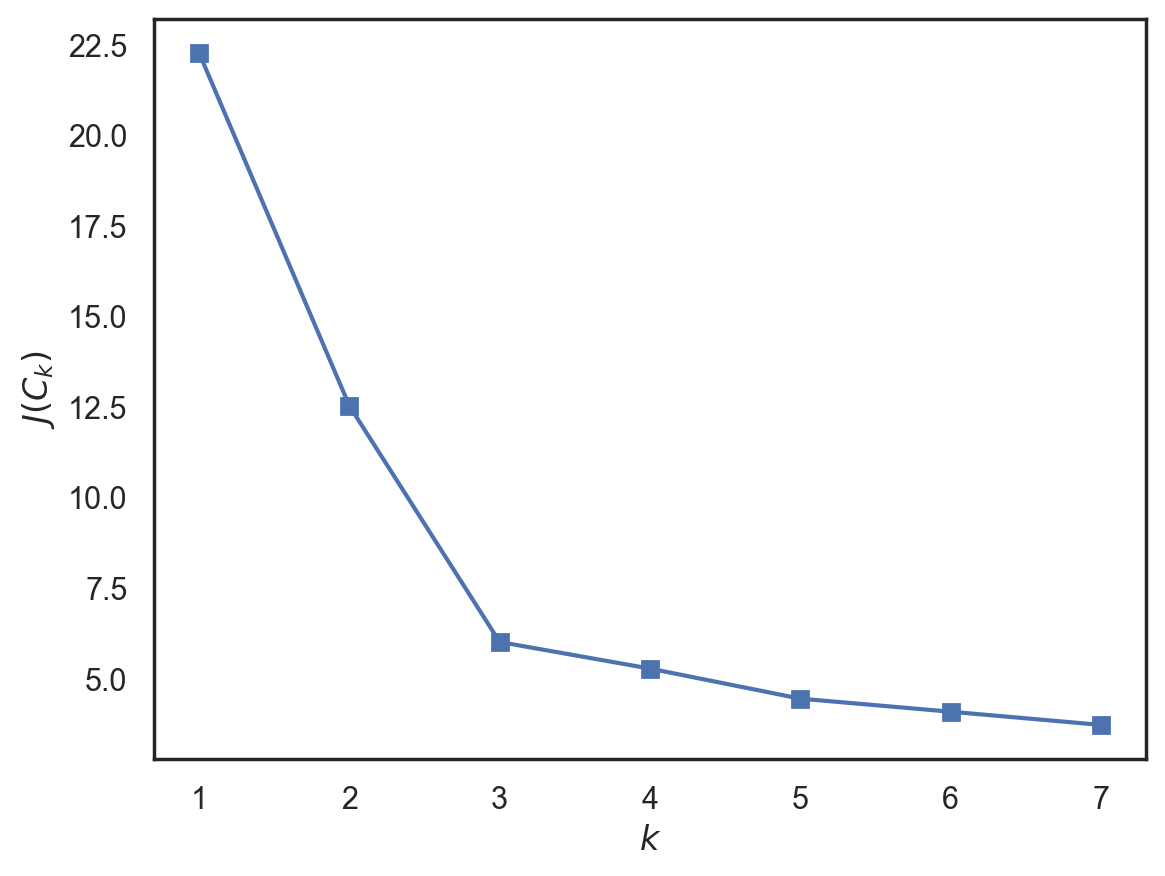

In [8]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=10).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

We see that $J(C_k)$ decreases significantly until the number of clusters is $3$ and then does not change as much anymore. This means that the optimal number of clusters is $3$. 

## $k$-Means limitations

Inherently, $K$-means is NP-hard. For $d$ dimensions, $k$ clusters, and $n$ observations, we will find a solution in $O(n^{d k+1})$ time. There are some heuristics to deal with this; an example is MiniBatch K-means, which takes portions (batches) of data instead of fitting the whole dataset and then moves centroids by taking the average of the previous steps.

Also, $K$-means clustering performs best on data that are spherical. Spherical data are data that group in space in close proximity to each other. This can be visualized in 2 or 3 dimensional space more easily.

Data that aren’t spherical or should not be spherical do not work well with k-means clustering. For example, on the below data:

<img src="images/nonspherical.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

k-means clustering would not do well:

<img src="images/nonspherical-result.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

# Hierarchical Clustering

Hierarchical clustering, also known as hierarchical cluster analysis (HCA), is an unsupervised clustering algorithm that can be categorized in two ways: agglomerative or divisive.

__Agglomerative__ clustering is considered a "bottoms-up approach". In this method we assign each observation to its own cluster. Then, compute the similarity (e.g., distance) between each of the clusters and join the two most similar clusters. Finally, repeat these steps until there is only a single cluster left.

__Divisive__ clustering can be defined as the opposite of agglomerative clustering; instead it takes a "top-down" approach. In this method we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation.

Divisive clustering is not commonly used, but it is still worth noting in the context of hierarchical clustering.

<img src="images/hca.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

Four different methods are commonly used to measure similarity:

* _Single (or minimum) linkage_: This method is defined by the minimum distance between two points in each cluster. For example, the distance between clusters $r$ and $s$ is equal to the length of the arrow between their two closest points: $d(r, s) = min_{x_i \in r, x_j \in s} ||x_i - x_j||$

<img src="images/single.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

* _Average linkage_: This method is defined by the mean distance between two points in each cluster. For example, the distance between clusters $r$ and $s$ is equal to the average length of each arrow connecting the points of one cluster to the other: $d(r, s) = \frac{1}{n_i n_j} \sum_{x_i \in r} \sum_{x_j \in s} ||x_i - x_j||$

<img src="images/average.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

* _Complete (or maximum) linkage_: This method is defined by the maximum distance between two points in each cluster. For example, the distance between clusters $r$ and $s$ is equal to the length of the arrow between their two furthest points: $d(r, s) = max_{x_i \in r, x_j \in s} ||x_i - x_j||$

<img src="images/complete.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

* _Ward’s linkage_: This method states that the distance between two clusters is defined by the increase in the sum of squared after the clusters are merged.

* _Centroid linkage_: $d(r, s) = ||\mu_r - \mu_s||$

The average linkage is the most effective in computation time since it does not require recomputing the distances every time the clusters are merged.

[Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) is the most common metric used to calculate these distances; however, other metrics, such as [Manhattan distance](https://www.educative.io/answers/what-is-manhattan-distance-in-machine-learning), are also used.

These clustering processes are usually visualized using a dendrogram. [Dendograms](https://en.wikipedia.org/wiki/Dendrogram) are tree diagrams frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. The [clades](https://en.wikipedia.org/wiki/Clade) are arranged according to how similar (or dissimilar) they are. Clades that are close to the same height are similar to each other; clades with different heights are dissimilar — the greater the difference in height, the more dissimilarity. 

An example involving the famous Iris data set is shown below.

<img src="images/dendrogram.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" height='400px' width = '400px'>

## Algorithm

- __Initialisation__: Starts by assigning each of the $n$ points its own cluster

- __Iteration__:
    * Find the two nearest clusters, and join them together, leading to $n-1$ clusters
    * Continue the cluster merging process until all are grouped into a single cluster

- __Termination__: All observations are grouped within a single cluster.

After producing the hierarchical clustering result, we need to cut the tree (dendrogram) at a specific height to defined the clusters.

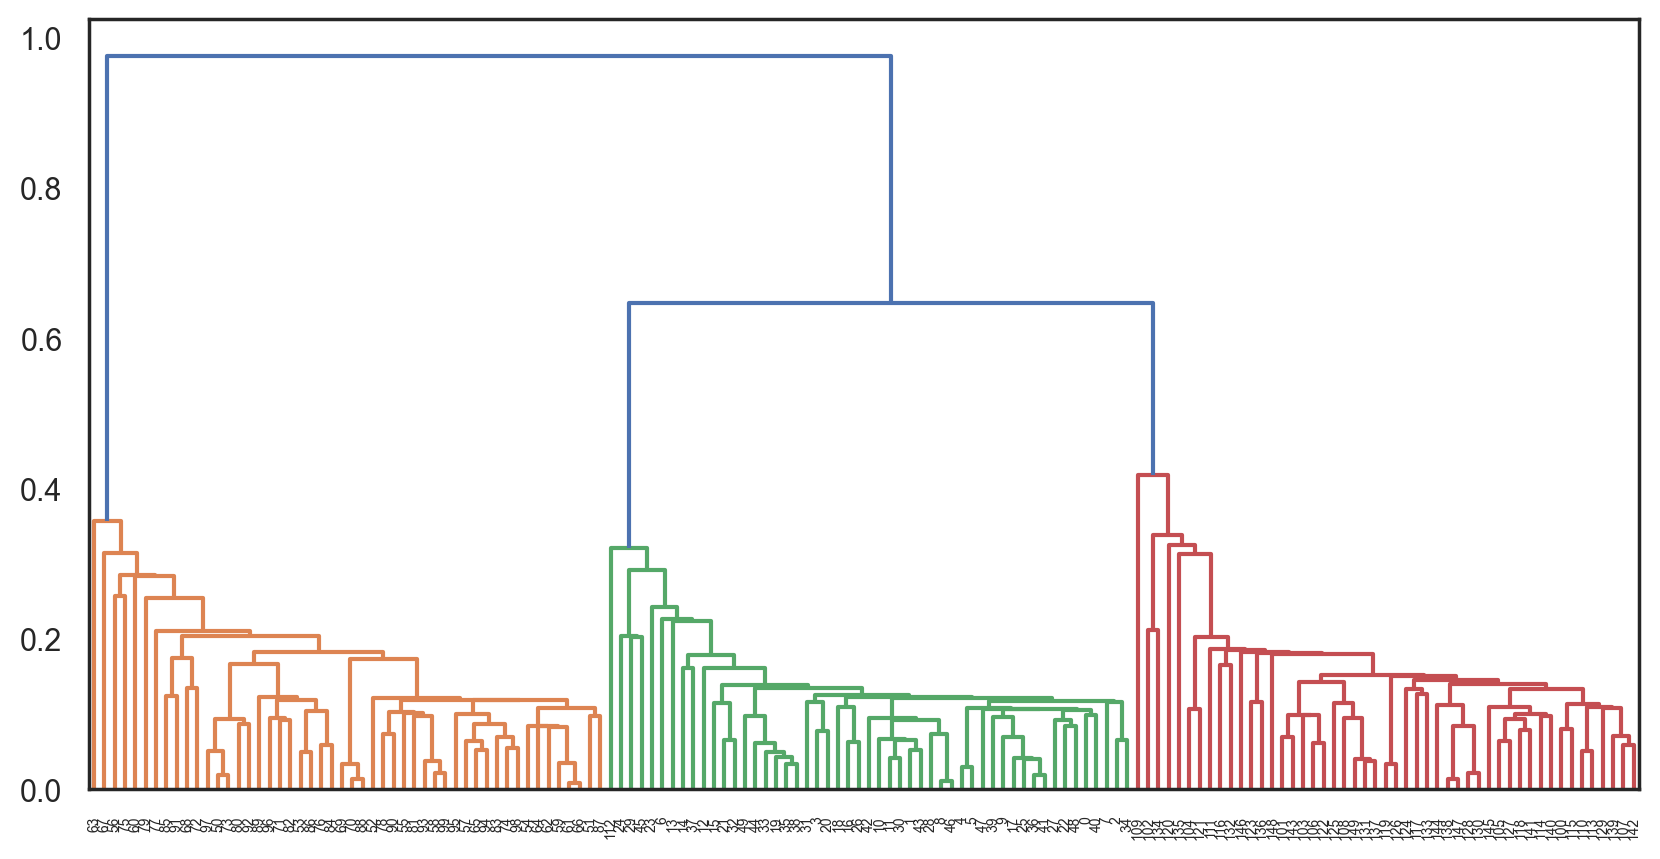

In [9]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=0.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=0.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=0.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=0.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=0.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=0.5, size=50)

# pdist will calculate the upper triangle of the pairwise distance matrix
distance_mat = pdist(X)
# linkage — is an implementation of agglomerative algorithm
Z = hierarchy.linkage(distance_mat, "single")
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

# Affinity Propagation

Affinity propagation is another example of a clustering algorithm. As opposed to K-means, this approach does not require us to set the number of clusters beforehand. The main idea here is that we would like to cluster our data based on the similarity of the observations (or how they "correspond" to each other).

Let's define a similarity metric such that $s(x_i, x_j) > s(x_i, x_k)$ if an observation $x_i$ is more similar to observation $x_j$ and less similar to observation $x_k$. A simple example of such a similarity metric is a negative square of distance $s(x_i, x_j) = - ||x_i - x_j||^{2}$.


Now, let's describe "correspondence" by making two zero matrices. One of them, $r_{i,k}$, determines how well the $k$-th observation is as a "role model" for the $i$-th observation with respect to all other possible "role models". Another matrix, $a_{i,k}$ determines how appropriate it would be for $i$-th observation to take the $k$-th observation as a "role model". This may sound confusing, but it becomes more understandable with some hands-on practice.

The matrices are updated sequentially with the following rules:

$$r_{i,k} \leftarrow s(x_i, x_k) - \max_{k' \neq k} \left\{ a_{i,k'} + s(x_i, x_k') \right\}$$

$$a_{i,k} \leftarrow \min \left( 0, r_{k,k} + \sum_{i' \not\in \{i,k\}} \max(0, r_{i',k}) \right), \ \ \  i \neq k$$

$$a_{k,k} \leftarrow \sum_{i' \neq k} \max(0, r_{i',k})$$

# Spectral clustering

Spectral clustering combines some of the approaches described above to create a stronger clustering method.

First of all, this algorithm requires us to define the similarity matrix for observations called the adjacency matrix. This can be done in a similar fashion as in the Affinity Propagation algorithm: $A_{i, j} = - ||x_i - x_j||^{2}$. This matrix describes a full graph with the observations as vertices and the estimated similarity value between a pair of observations as edge weights for that pair of vertices. For the metric defined above and two-dimensional observations, this is pretty intuitive - two observations are similar if the edge between them is shorter. 
We'd like to split up the graph into two subgraphs in such a way that each observation in each subgraph would be similar to another observation in that subgraph. Formally, this is a Normalized cuts problem.

## Accuracy metrics

As opposed to classfication, it is difficult to assess the quality of results from clustering. Here, a metric cannot depend on the labels but only on the goodness of split. Secondly, we do not usually have true labels of the observations when we use clustering.

There are _internal_ and _external_ goodness metrics. External metrics use the information about the known true split while internal metrics do not use any external information and assess the goodness of clusters based only on the initial data. The optimal number of clusters is usually defined with respect to some internal metrics. 

All the metrics described below are implemented in `sklearn.metrics`.

### Adjusted Rand Index (ARI)

Here, we assume that the true labels of objects are known. This metric does not depend on the labels' values but on the data cluster split. Let $N$ be the number of observations in a sample. Let $a$ to be the number of observation pairs with the same labels and located in the same cluster, and let $b$ to be the number of observation pairs with different labels and located in different clusters. The Rand Index can be calculated using the following formula: $$\text{RI} = \frac{2(a + b)}{n(n-1)}.$$ 
In other words, it evaluates a share of observation pairs for which these splits (initial and clustering result) are consistent. The Rand Index (RI) evaluates the similarity of the two splits of the same sample. In order for this index to be close to zero for any clustering outcomes with any $n$ and number of clusters, it is essential to scale it, hence the Adjusted Rand Index: $$\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}.$$

This metric is symmetric and does not depend in the label permutation. Therefore, this index is a measure of distances between different sample splits. $\text{ARI}$ takes on values in the $[-1, 1]$ range. Negative values indicate the independence of splits, and positive values indicate that these splits are consistent (they match $\text{ARI} = 1$).

### Adjusted Mutual Information (AMI)

This metric is similar to $\text{ARI}$. It is also symmetric and does not depend on the labels' values and permutation. It is defined by the [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) function and interprets a sample split as a discrete distribution (likelihood of assigning to a cluster is equal to the percent of objects in it). The $MI$ index is defined as the [mutual information](https://en.wikipedia.org/wiki/Mutual_information) for two distributions, corresponding to the sample split into clusters. Intuitively, the mutual information measures the share of information common for both clustering splits i.e. how information about one of them decreases the uncertainty of the other one.

Similarly to the $\text{ARI}$, the $\text{AMI}$ is defined. This allows us to get rid of the $MI$ index's increase with the number of clusters. The $\text{AMI}$ lies in the $[0, 1]$ range. Values close to zero mean the splits are independent, and those close to 1 mean they are similar (with complete match at $\text{AMI} = 1$).

### Homogeneity, completeness, V-measure

Formally, these metrics are also defined based on the entropy function and the conditional entropy function, interpreting the sample splits as discrete distributions: $$h = 1 - \frac{H(C\mid K)}{H(C)}, c = 1 - \frac{H(K\mid C)}{H(K)},$$
where $K$ is a clustering result and $C$ is the initial split. Therefore, $h$ evaluates whether each cluster is composed of same class objects, and $c$ measures how well the same class objects fit the clusters. These metrics are not symmetric. Both lie in the $[0, 1]$ range, and values closer to 1 indicate more accurate clustering results. These metrics' values are not scaled as the $\text{ARI}$ or $\text{AMI}$ metrics are and thus depend on the number of clusters. A random clustering result will not have metrics' values closer to zero when the number of clusters is big enough and the number of objects is small. In such a case, it would be more reasonable to use $\text{ARI}$. However, with a large number of observations (more than 100) and the number of clusters less than 10, this issue is less critical and can be ignored.

$V$-measure is a combination of $h$, and $c$ and is their harmonic mean:
$$v = 2\frac{hc}{h+c}.$$
It is symmetric and measures how consistent two clustering results are.

### Silhouette

In contrast to the metrics described above, this coefficient does not imply the knowledge about the true labels of the objects. It lets us estimate the quality of the clustering using only the initial, unlabeled sample and the clustering result. To start with, for each observation, the silhouette coefficient is computed. Let $a$ be the mean of the distance between an object and other objects within one cluster and $b$ be the mean distance from an object to objects from the nearest cluster (different from the one the object belongs to). Then the silhouette measure for this object is $$s = \frac{b - a}{\max(a, b)}.$$

The silhouette of a sample is a mean value of silhouette values from this sample. Therefore, the silhouette distance shows to which extent the distance between the objects of the same class differ from the mean distance between the objects from different clusters. This coefficient takes values in the $[-1, 1]$ range. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette value is, the better the results from clustering.

With the help of silhouette, we can identify the optimal number of clusters $k$ (if we don't know it already from the data) by taking the number of clusters that maximizes the silhouette coefficient.

### Metrics example
Let's take a look at how these metrics perform with the MNIST handwritten numbers dataset:

In [10]:
import pandas as pd
from sklearn import datasets, metrics
from sklearn.cluster import (AffinityPropagation, AgglomerativeClustering, KMeans, SpectralClustering)

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=1, n_init=10))
algorithms.append(AffinityPropagation())
algorithms.append(
    SpectralClustering(n_clusters=10, random_state=1, affinity="nearest_neighbors")
)
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(
        (
            {
                "ARI": metrics.adjusted_rand_score(y, algo.labels_),
                "AMI": metrics.adjusted_mutual_info_score(y, algo.labels_),
                "Homogenity": metrics.homogeneity_score(y, algo.labels_),
                "Completeness": metrics.completeness_score(y, algo.labels_),
                "V-measure": metrics.v_measure_score(y, algo.labels_),
                "Silhouette": metrics.silhouette_score(X, algo.labels_),
            }
        )
    )

results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means", "Affinity", "Spectral", "Agglomerative"],
)

results

ARI       AMI  Homogenity  Completeness  V-measure  \
K-means        0.667179  0.736804    0.735623      0.743268   0.739426   
Affinity       0.174871  0.612364    0.958899      0.486801   0.645767   
Spectral       0.756461  0.852040    0.831691      0.876614   0.853562   
Agglomerative  0.794003  0.866832    0.857513      0.879096   0.868170   

               Silhouette  
K-means          0.182247  
Affinity         0.115161  
Spectral         0.182729  
Agglomerative    0.178497

# Dimensionality Reduction
While more data generally yields more accurate results, it can also impact the performance of machine learning algorithms (e.g., overfitting) and it can also make it difficult to visualize datasets. Dimensionality reduction is a technique used when the number of features, or dimensions, in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the integrity of the dataset as much as possible. It is commonly used in the preprocessing data stage, and there are a few different dimensionality reduction methods that can be used, such as:

__Principal component analysis (PCA)__ is a type of dimensionality reduction algorithm which is used to reduce redundancies and to compress datasets through feature extraction. This method uses a linear transformation to create a new data representation, yielding a set of "principal components". The first principal component is the direction which maximizes the variance of the dataset. While the second principal component also finds the maximum variance in the data, it is completely uncorrelated to the first principal component, yielding a direction that is perpendicular, or orthogonal, to the first component. This process repeats based on the number of dimensions, where a next principal component is the direction orthogonal to the prior components with the most variance.

__Singular value decomposition (SVD)__ is another dimensionality reduction approach which factorizes a matrix $A$ into three, low-rank matrices. SVD is denoted by the formula

$$\underbrace{\mathbf{A}}_{m \times n} = \underbrace{\mathbf{U}}_{m \times m} \times \underbrace{\mathbf{\Sigma}}_{m\times n} \times \underbrace{\mathbf{V}^{\text{T}}}_{n \times n},$$

where $U$ and $V$ are orthogonal matrices. $\Sigma$ is a diagonal matrix, and $\Sigma$ values are considered singular values of matrix $A$. Similar to PCA, it is commonly used to reduce noise and compress data, such as image files.

__Autoencoders__ leverage neural networks to compress data and then recreate a new representation of the original data’s input. Looking at the image below, you can see that the hidden layer specifically acts as a bottleneck to compress the input layer prior to reconstructing within the output layer. The stage from the input layer to the hidden layer is referred to as _encoding_ while the stage from the hidden layer to the output layer is known as _decoding_.

<img src="images/autoenc.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width = '50%'>

## Principal Component Analysis (PCA)

Principal component analysis (PCA) is a statistical procedure that uses an [orthogonal transformation](https://en.wikipedia.org/wiki/Orthogonal_transformation) to convert a set of observations of possibly correlated variables into a set of values of [linearly uncorrelated](https://en.wikipedia.org/wiki/Correlation_and_dependence) variables called __principal components__. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one.

This transformation is defined in such a way that the first principal component has the largest possible [variance](https://en.wikipedia.org/wiki/Variance) (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is [orthogonal](https://en.wikipedia.org/wiki/Orthogonal) the preceding components. The resulting vectors are an uncorrelated [orthogonal basis set](https://en.wikipedia.org/wiki/Orthogonal_basis_set). 

<img src="images/pca.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width = '50%'>

More generally speaking, all observations can be considered as an ellipsoid in a subspace of an initial feature space, and the new basis set in this subspace is aligned with the ellipsoid axes. This assumption lets us remove highly correlated features since basis set vectors are orthogonal.

In the general case, the resulting ellipsoid dimensionality matches the initial space dimensionality, but the assumption that our data lies in a subspace with a smaller dimension allows us to cut off the "excessive" space with the new projection (subspace). We accomplish this in a 'greedy' fashion, sequentially selecting each of the ellipsoid axes by identifying where the dispersion is maximal.

PCA is sensitive to the relative scaling of the original variables.

PCA was invented in 1901 by [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) as an analogue of the principal axis theorem in mechanics; it was later independently developed and named by [Harold Hotelling](https://en.wikipedia.org/wiki/Harold_Hotelling) in the 1930s.

Computing the [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) is now the standard way to calculate a principal components analysis from a data matrix.

### Algorithm
In order to decrease the dimensionality of our data from $n$ to $k$ with $k \leq n$, we sort our list of axes in order of decreasing dispersion and take the top-$k$ of them.

We begin by computing the dispersion and the covariance of the initial features. This is usually done with the covariance matrix. According to the covariance definition, the covariance of two features is computed as follows: $$cov(X_i, X_j) = E[(X_i - \mu_i) (X_j - \mu_j)] = E[X_i X_j] - \mu_i \mu_j,$$ where $\mu_i$ is the expected value of the $i$-th feature. It is worth noting that the covariance is symmetric, and the covariance of a vector with itself is equal to its dispersion.

Therefore the covariance matrix is symmetric with the dispersion of the corresponding features on the diagonal. Non-diagonal values are the covariances of the corresponding pair of features. In terms of matrices where $\mathbf{X}$ is the matrix of observations, the covariance matrix is as follows:

$$\Sigma = E[(\mathbf{X} - E[\mathbf{X}]) (\mathbf{X} - E[\mathbf{X}])^{T}]$$

> Note: Matrices, as linear operators, have eigenvalues and eigenvectors. They are very convenient because they describe parts of our space that do not rotate and only stretch when we apply linear operators on them; eigenvectors remain in the same direction but are stretched by a corresponding eigenvalue. Formally, a matrix $M$ with eigenvector $w_i$ and eigenvalue $\lambda_i$ satisfy this equation: $M w_i = \lambda_i w_i$.

The covariance matrix for a sample $\mathbf{X}$ can be written as a product of $\mathbf{X}^{T} \mathbf{X}$. According to the [Rayleigh quotient](https://en.wikipedia.org/wiki/Rayleigh_quotient), the maximum variation of our sample lies along the eigenvector of this matrix and is consistent with the maximum eigenvalue. Therefore, the principal components we aim to retain from the data are just the eigenvectors corresponding to the top-$k$ largest eigenvalues of the matrix.

The next steps are easier to digest. We multiply the matrix of our data $X$ by these components to get the projection of our data onto the orthogonal basis of the chosen components. If the number of components was smaller than the initial space dimensionality, remember that we will lose some information upon applying this transformation.

PCA in general will find linear combinations of the original variables. These new linear combinations will maximise the variance of the data.

### PCA Example
First, try out the iris example from the `scikit-learn` documentation:

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

sns.set(style="white")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn import datasets

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data= np.c_[X, y], columns= iris['feature_names'] + ['target'])

df.loc[df['target']==0.0, "species"] = "Setosa"
df.loc[df['target']==1.0, "species"] = "Versicolour"
df.loc[df['target']==2.0, "species"] = "Virginica"

fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal length (cm)', color='species', opacity=0.8)
fig.show()

Now let's see how PCA will improve the results of a simple model that is not able to correctly fit all of the training data:

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.88889


Let's try this again, but, this time, let's reduce the dimensionality to 2 dimensions:

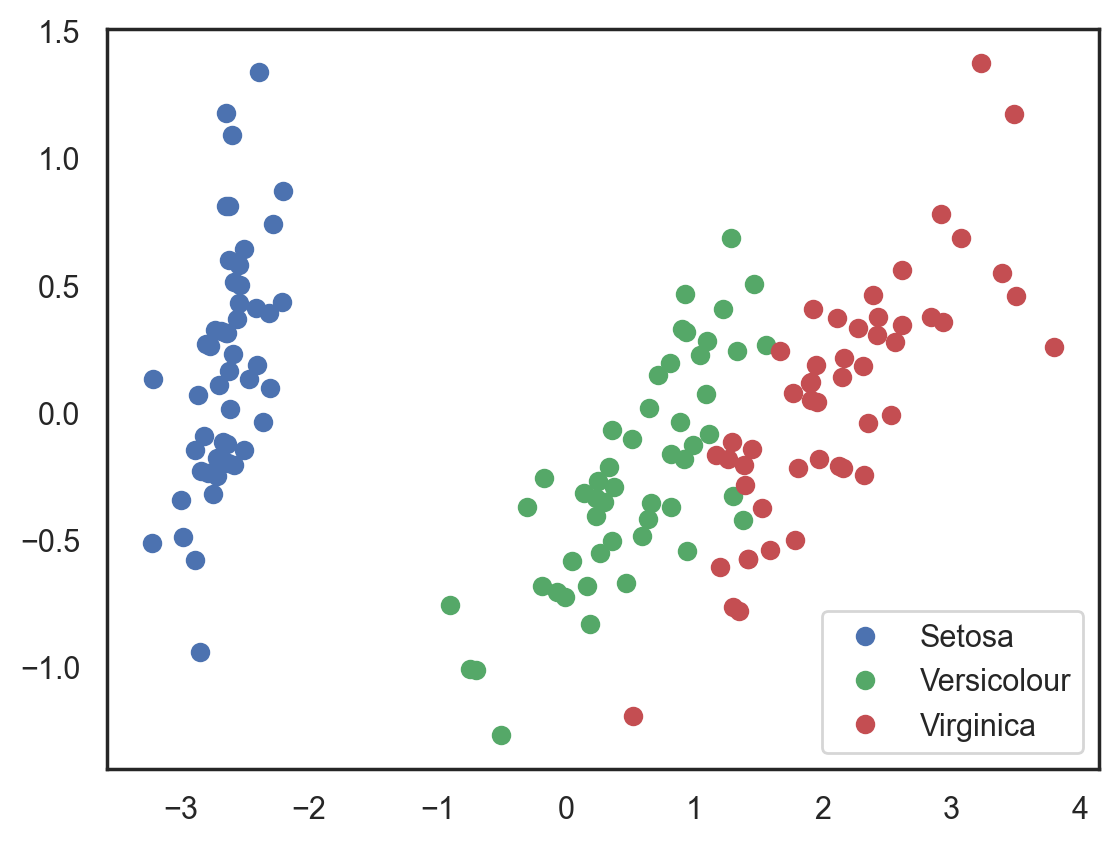

In [13]:
# Using PCA from sklearn PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Plotting the results of PCA
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], "bo", label="Setosa")
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], "go", label="Versicolour")
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], "ro", label="Virginica")
plt.legend(loc=0);

In [14]:
# Test-train split and apply PCA
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, stratify=y, random_state=42
)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print("Accuracy: {:.5f}".format(accuracy_score(y_test, preds.argmax(axis=1))))

Accuracy: 0.91111


The accuracy increased (but not significantly in this case). With other datasets with a high number of dimensions, PCA can drastically improve the accuracy of decision trees and other ensemble methods.

Now let's check out the percent of variance that can be explained by each of the selected components.

In [15]:
for i, component in enumerate(pca.components_):
    print(
        "{} component: {}% of initial variance".format(
            i + 1, round(100 * pca.explained_variance_ratio_[i], 2)
        )
    )
    print(
        " + ".join(
            "%.3f x %s" % (value, name)
            for value, name in zip(component, iris.feature_names)
        )
    )

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


### t-distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE is a tool for data visualization. It reduces the dimensionality of data to 2 or 3 dimensions so that it can be plotted easily by converting distances between data in the original space to probabilities. Local similarities are preserved by this embedding.

It is used in data exploration and for visualizing high-dimension data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

It is an unsupervised, non-linear technique. Non-linear means that the algorithm allows us to separate data that cannot be separated by a straight line. 

The t-SNE algorithm finds the similarity measure between pairs of instances in higher and lower dimensional space. After that, it tries to optimize two similarity measures. It does all of that in three steps. 

1. t-SNE models a point being selected as a neighbor of another point in both higher and lower dimensions. It starts by calculating a pairwise similarity between all data points in the high-dimensional space using a Gaussian kernel. The points that are far apart have a lower probability of being picked than the points that are close together. 
2. Then, the algorithm tries to map higher dimensional data points onto lower dimensional space while preserving the pairwise similarities. It is achieved by minimizing the divergence between the probability distribution of the original high-dimensional and lower-dimensional. The algorithm uses gradient descent to minimize the divergence. The lower-dimensional embedding is optimized to a stable state.
2. The optimization process allows the creation of clusters and sub-clusters of similar data points in the lower-dimensional space that are visualized to understand the structure and relationship in the higher-dimensional data.

Applications of t-SNE:

Apart from visualizing complex multi-dimensional data, t-SNE has other uses mostly in the medical field. 

* **Clustering and classification**: to cluster similar data points together in lower dimensional space. It can also be used for classification and finding patterns in the data. 
* **Anomaly detection**: to identify outliers and anomalies in the data. 
* **Natural language processing**: to visualize word embeddings generated from a large corpus of text that makes it easier to identify similarities and relationships between words.
* **Computer security**: to visualize network traffic patterns and detect anomalies.
* **Cancer research**: to visualize molecular profiles of tumor samples and identify subtypes of cancer. 
* **Geological domain interpretation**: to visualize seismic attributes and to identify geological anomalies. 
* **Biomedical signal processing**: to visualize electroencephalogram (EEG) and detect patterns of brain activity. 

One of the [popular t-SNE experiments](https://lvdmaaten.github.io/publications/papers/JMLR_2008.pdf) is to visualize 6000 handwritten digits (from 0 to 9) from MNIST dataset (image size is 28x28 pixel):

<img src="images/digit.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

Result:

<img src="images/tsne.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;">

# Applying unsupervised learning algorithms to real datasets
Install pre-requisites

In [12]:
%%capture
%pip install scikit-learn plotly pandas nbformat seaborn

## $k$-Means

A good example of $k$-means that is used by Google and OpenAI is about analysing [California housing data from Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download).

We will cluster the houses by location and observe how house prices fluctuate across California.

The data includes 3 variables that we will use:

* `longitude`: A value representing how far west a house is. Higher values represent houses that are further West.
* `latitude`: A value representing how far north a house is. Higher values represent houses that are further north.
* `median_house_value`: The median house price within a block measured in USD. 

In [13]:
import pandas as pd

home_data = pd.read_csv('./data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

longitude  latitude  median_house_value
0    -122.23     37.88            452600.0
1    -122.22     37.86            358500.0
2    -122.24     37.85            352100.0
3    -122.25     37.85            341300.0
4    -122.25     37.85            342200.0

Let's start by visualizing the housing data. We look at the location data with a heatmap based on the median price in a block.

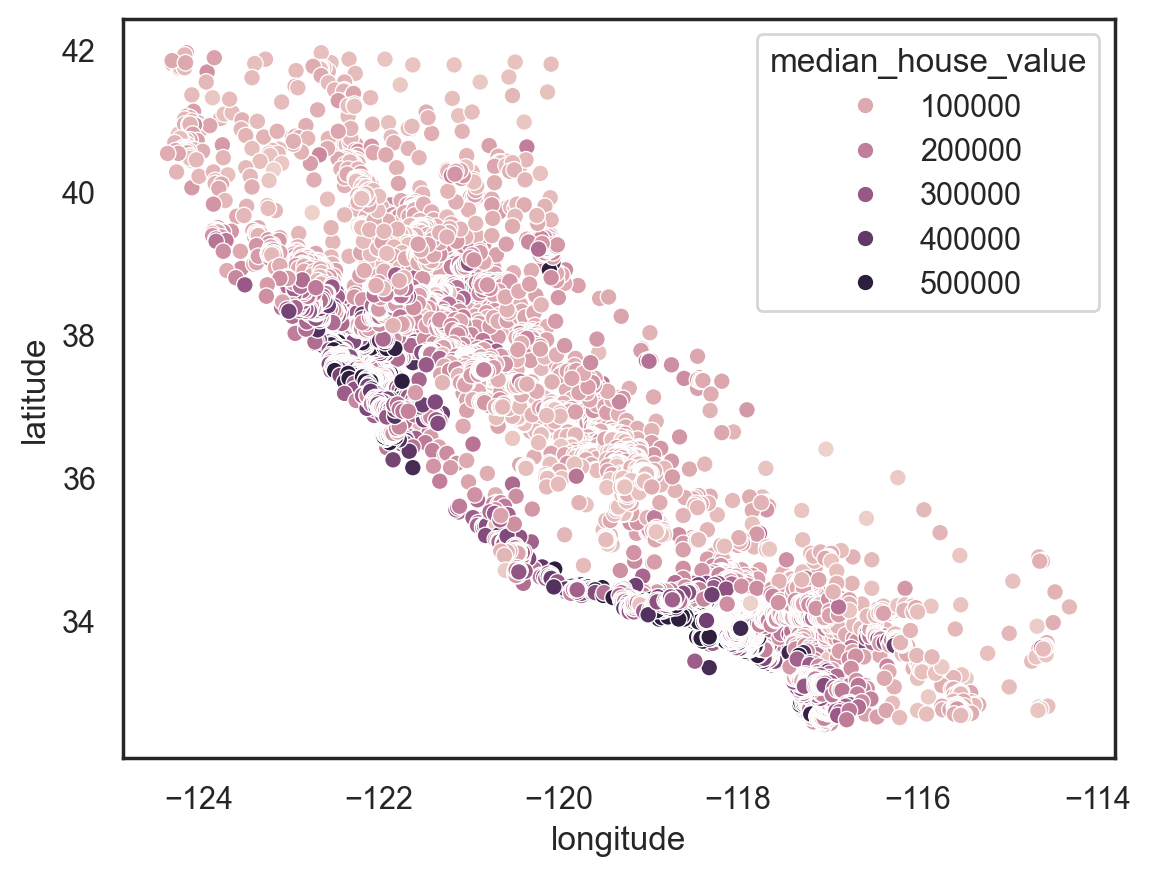

In [14]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value');

We can see that most of the expensive houses are on the west coast of California with different areas that have clusters of moderately priced houses.

Clusters are often easy to spot when you are only using 2 or 3 features. It becomes increasingly difficult or impossible when the number of features grows.

When working with distance-based algorithms, like $k$-Means Clustering, we must normalize the data. If we do not normalize the data, variables with different scaling will be weighted differently in the distance formula that is being optimized during training.

> Example: if we were to include price in the cluster, in addition to latitude and longitude, price would have an outsized impact on the optimizations because its scale is significantly larger and wider than the bounded location variables.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

For the first iteration, we will arbitrarily choose a number of clusters ($k$) of $3$.

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm);

Once the model is fit, we can visualize the data. 

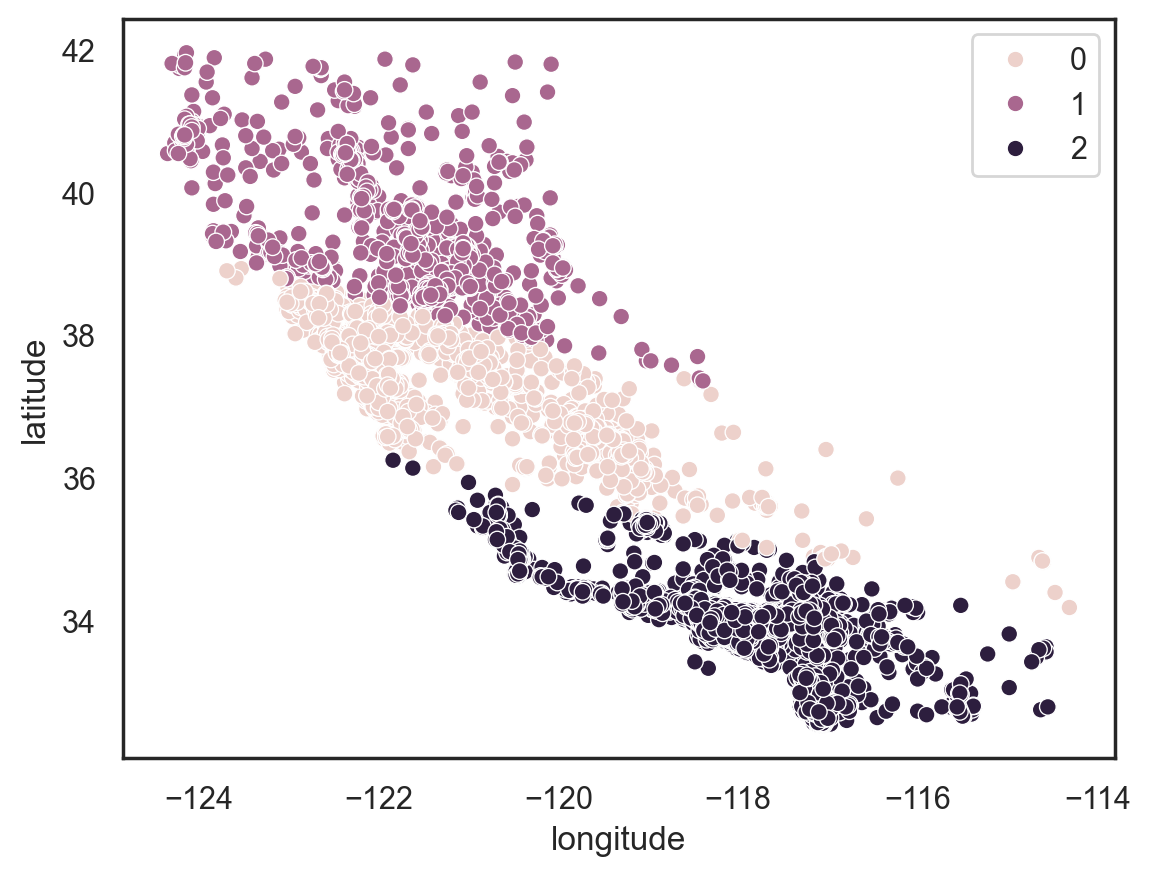

In [17]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_);

We see that the data are now clearly split into 3 distinct groups (Northern California, Central California, and Southern California). We can also look at the distribution of median house prices in these 3 groups using a boxplot.

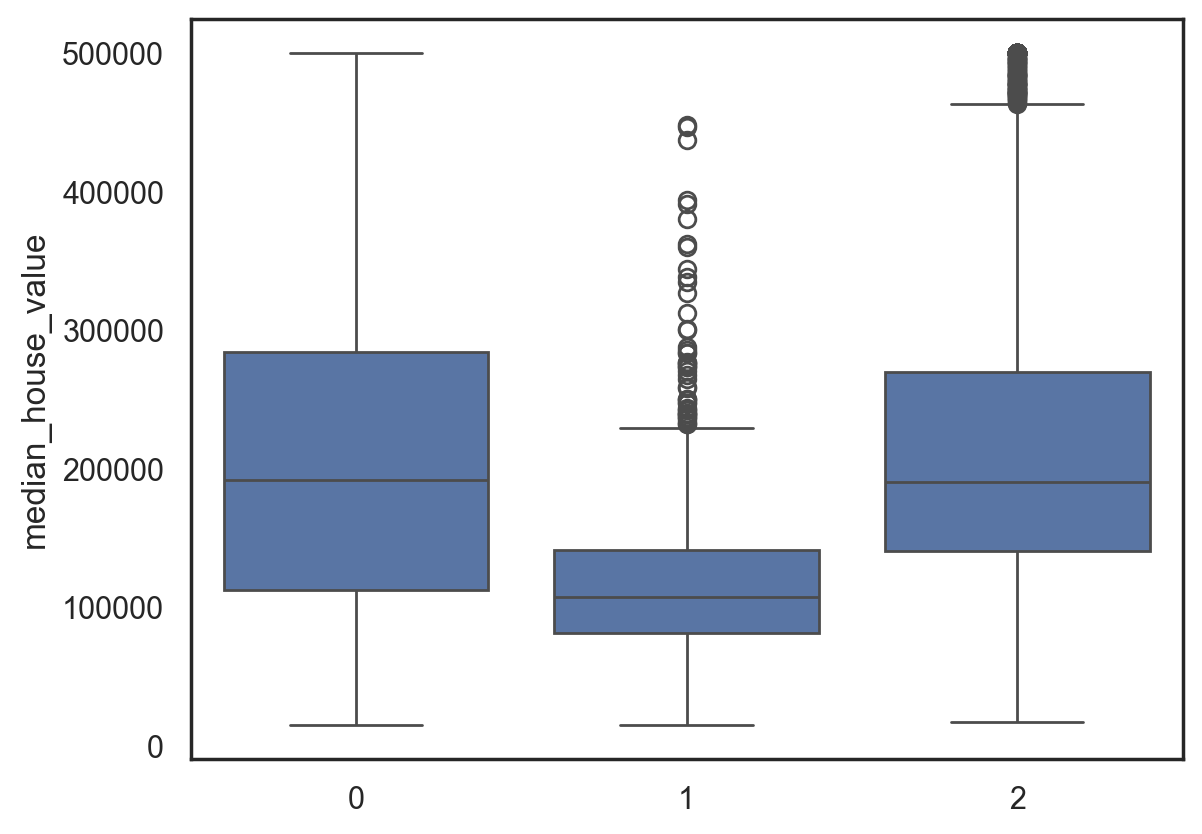

In [18]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value']);

We clearly see that the Northern and Southern clusters have similar distributions of median house values (clusters 0 and 2) that are higher than the prices in the central cluster (cluster 1).

We can evaluate performance of the clustering algorithm using a Silhouette score where a lower score represents a better fit. But since we have used only $k=3$, we do not know how good of a fit it is.

In [19]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

To figure out what is the best $k$ we need to re-run the model with multiple values and see what is the best.

In [20]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

Typically, as we increase the value of $k$, we see improvements in clusters and what they represent until a certain point. Then we start to see diminishing returns or even worse performance.

<Axes: >

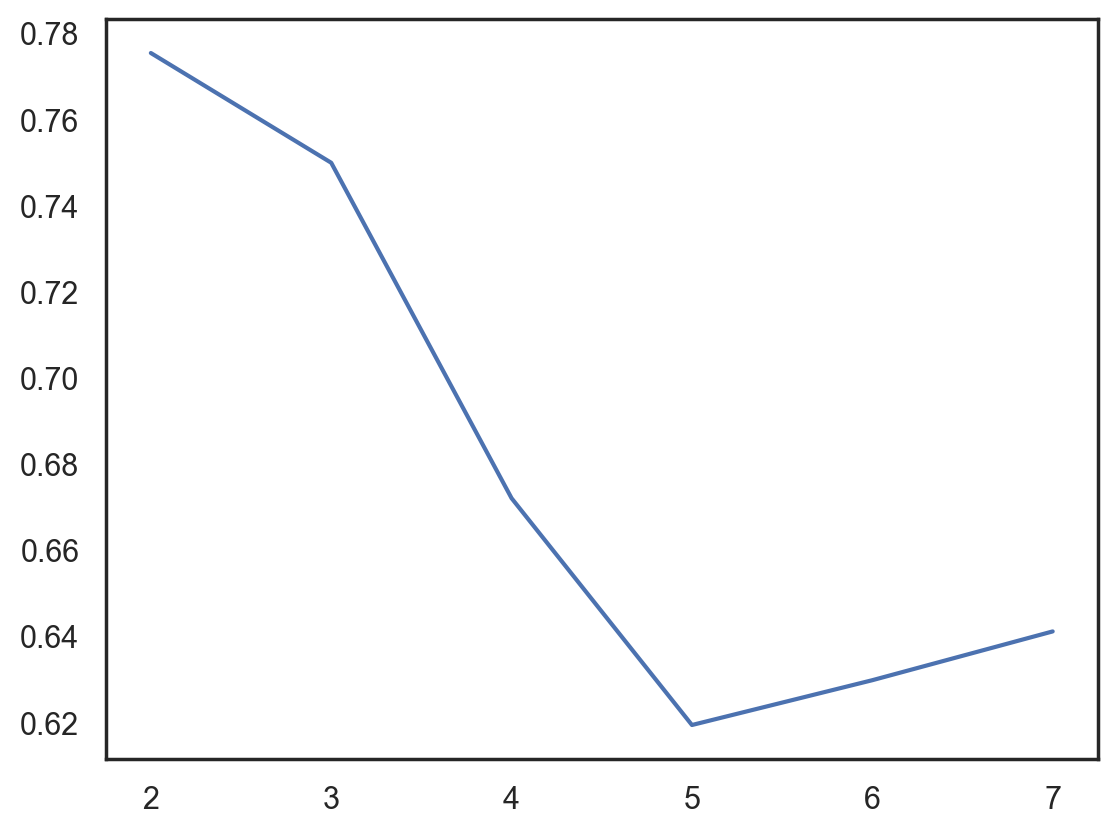

In [21]:
sns.lineplot(x = K, y = score)

We see $k = 5$ is probably the best we can do. 

<Axes: xlabel='longitude', ylabel='latitude'>

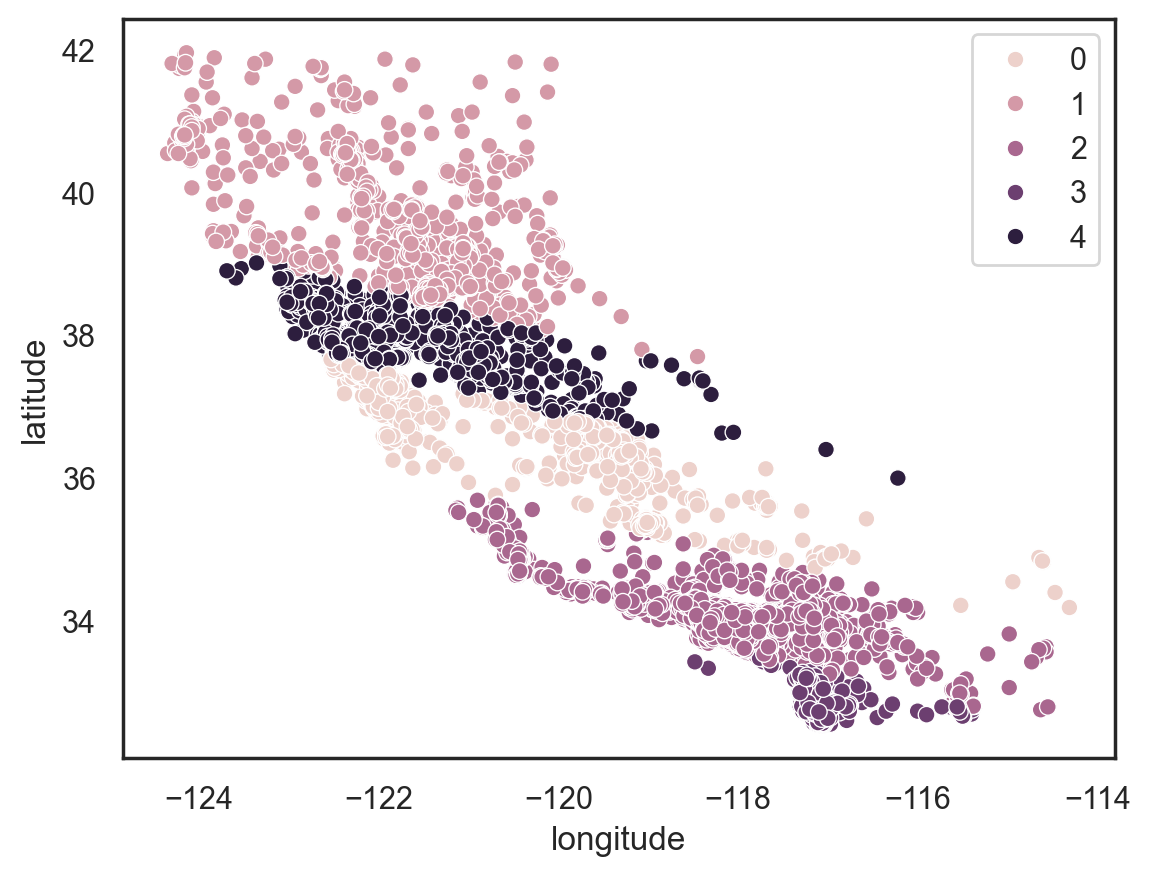

In [22]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<Axes: ylabel='median_house_value'>

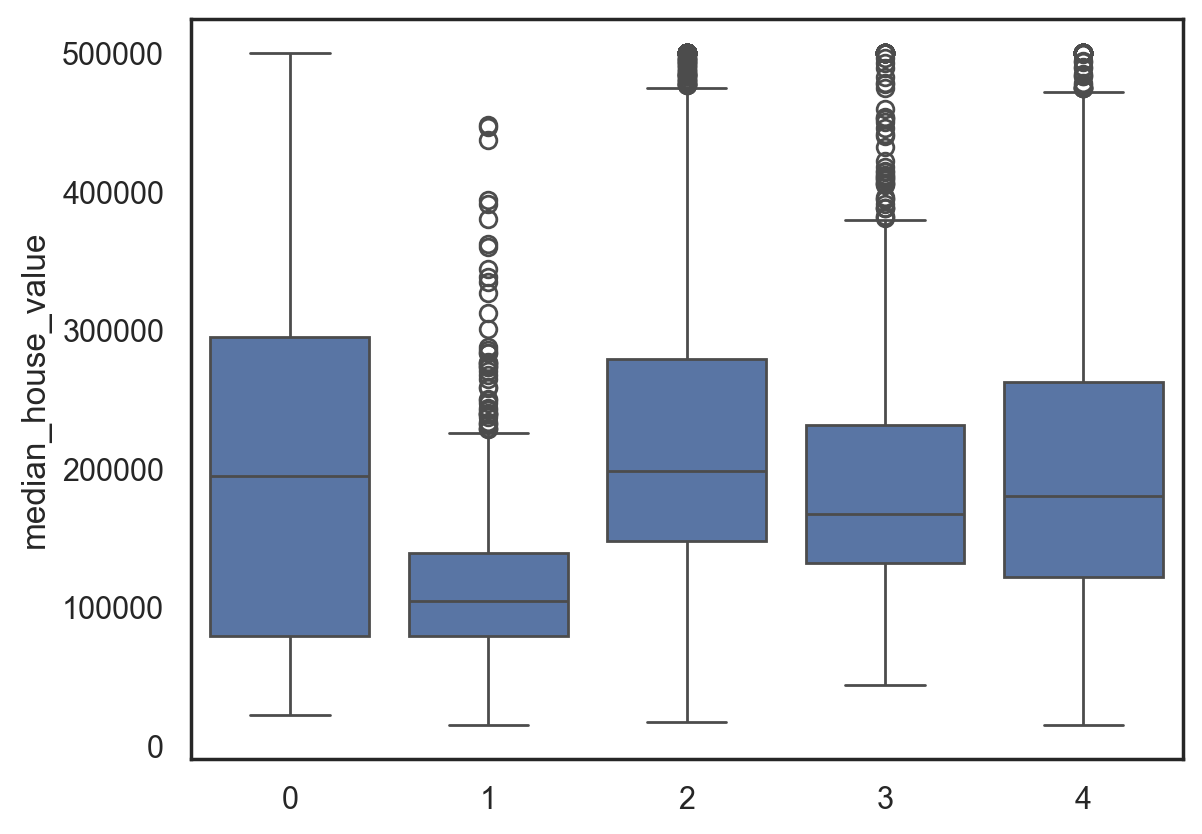

In [23]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

## PCA & t-SNE
For this example we will generate synthetic data with 6 features, 1500 samples, and 3 classes.

First, we import required libraries.

In [24]:
import plotly.express as px
from sklearn.datasets import make_classification

Next, we'll generate and visualize the dataset.

In [25]:
X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)


fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()

Now we can apply the PCA algorithm on the dataset to return two PCA components. The `fit_transform` learns and transforms the dataset at the same time.  

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

We can now visualize the results by displaying two PCA components on a scatter plot. 

* **x**: First component
* **y**: Second companion
* **color**: target variable

In [27]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

Let's apply the t-SNE algorithm to the dataset and compare the results.

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

Similar to PCA, we will visualize two t-SNE components on a scatter plot.

In [29]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

The result is quite better than PCA. We can clearly see three big clusters. 

# What algorithms to choose?

Depending on the type and characteristics of your data, you need to choose the appropriate algorithms and techniques for unsupervised learning. You should also consider the scalability, complexity, and interpretability of the algorithms and techniques, as well as their assumptions and limitations.

Most algorithms are suited for different purposes, while you are still starting your ML journely you can choose:
* For Clustering:
    * $k$-Means to group well-defined clusters. If you have too much data, you can use Mini Batch $k$-Means
    * DBSCAN to cluster groups with complex shapes
* For Diminsionality reduction
    * PCA to visualize linear data
    * T-SNE to visualize non-linear data

As a rule of thumb, always try multiple visualization and clustering techniques. Single technique can't tell you the whole story.